In [ ]:
pip install opencv-python

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
image = cv2.imread("content.jpg")

In [ ]:
wool = []
wool.append(cv2.imread("black_wool.png"))
wool.append(cv2.imread("blue_wool.png"))
wool.append(cv2.imread("brown_wool.png"))
wool.append(cv2.imread("cyan_wool.png"))
wool.append(cv2.imread("gray_wool.png"))
wool.append(cv2.imread("green_wool.png"))
wool.append(cv2.imread("light_blue_wool.png"))
wool.append(cv2.imread("light_gray_wool.png"))
wool.append(cv2.imread("lime_wool.png"))
wool.append(cv2.imread("magenta_wool.png"))
wool.append(cv2.imread("orange_wool.png"))
wool.append(cv2.imread("pink_wool.png"))
wool.append(cv2.imread("purple_wool.png"))
wool.append(cv2.imread("red_wool.png"))
wool.append(cv2.imread("white_wool.png"))
wool.append(cv2.imread("yellow_wool.png"))
len(wool)


16

In [ ]:
from random import randint
new_img = []
for j in range(100):

  new_img_line = wool[randint(0,15)]
  for i in range(100):

      
      rnd_img = wool[randint(0,15)]

      
      h1, w1 = new_img_line.shape[:2]
      h2, w2 = rnd_img.shape[:2]

      vis = np.zeros((max(h1, h2), w1+w2,3), np.uint8)

      #combine 2 images
      vis[:h1, :w1,:3] = new_img_line
      vis[:h2, w1:w1+w2,:3] = rnd_img
      new_img_line = vis
  if j == 0:
      new_img = new_img_line
  h1, w1 = new_img.shape[:2]
  h2, w2 = new_img_line.shape[:2]
  vis = np.zeros((h1+h2, max(w1,w2),3), np.uint8)

  #combine 2 images
  vis[:h1, :w1,:3] = new_img
  vis[h1:h1+h2,:w1,:3] = new_img_line
  new_img = vis

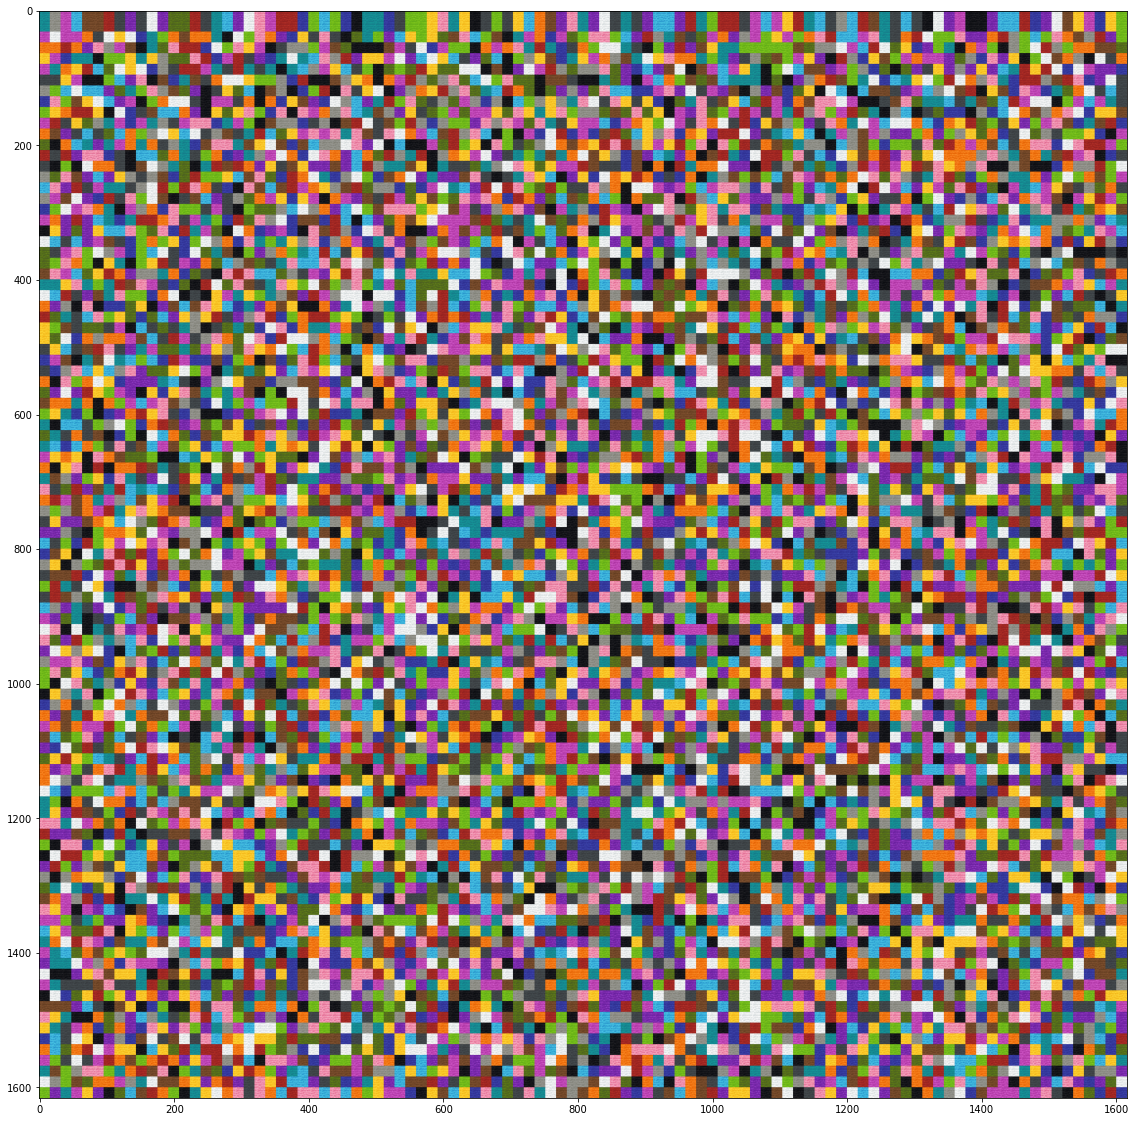

In [ ]:
plt.figure(figsize = (20,20))
plt.imshow(cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
image_resize = cv2.resize(image[::16,::16], (image.shape[1::-1]), interpolation = cv2.INTER_NEAREST)

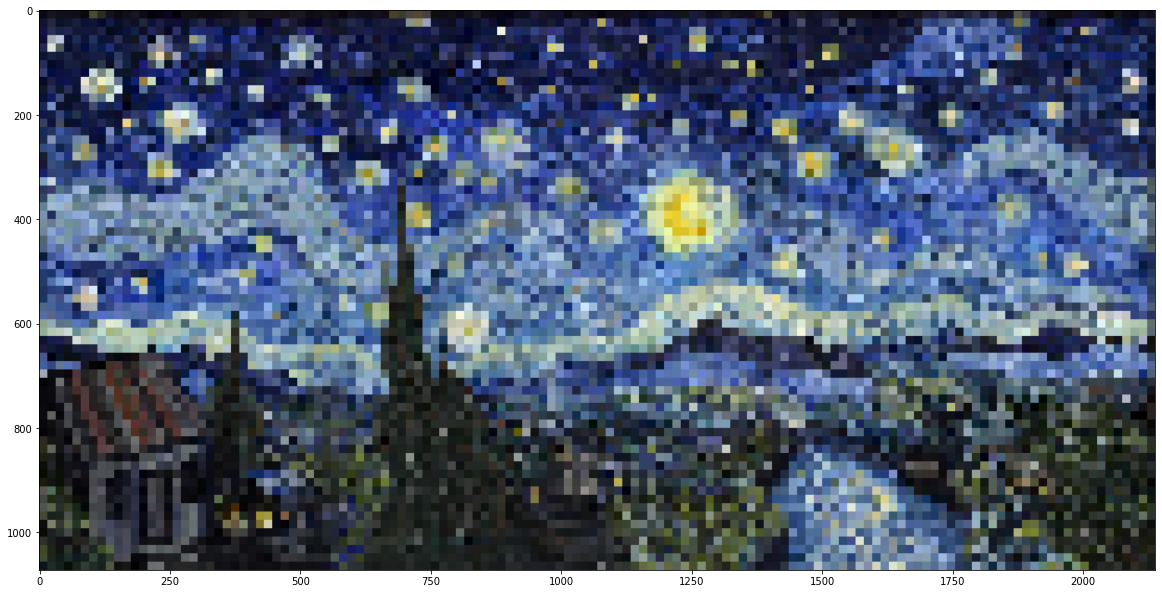

In [ ]:
plt.figure(figsize = (20,20))
plt.imshow(cv2.cvtColor(image_resize,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
img_16 = np.zeros(shape=(image_resize.shape[0]//16,image_resize.shape[1]//16,16,16,3),dtype=int)
for i in range(0,img_16.shape[0]):

  for j in range(0,img_16.shape[1]):

    img_16[i,j] = image_resize[i*16:i*16+16,j*16:j*16+16]
img_16.shape
 

(67, 133, 16, 16, 3)

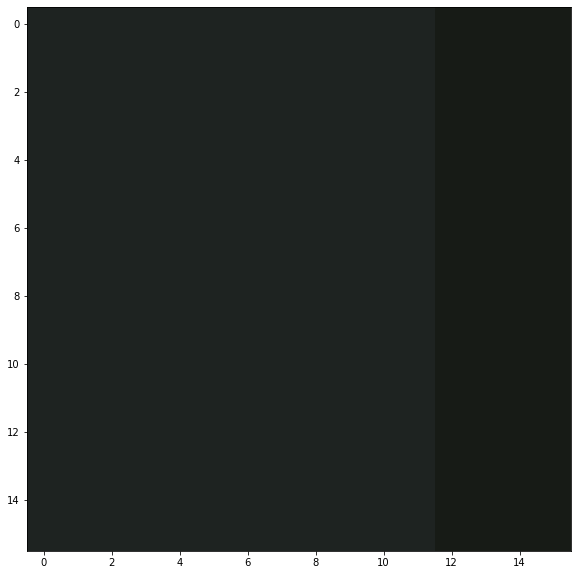

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(img_16[66,132],cmap='gray')
plt.show()

In [ ]:
# def choose_block(block, wool):
#     block_diff = np.array([block] * len(wool)) - np.array(wool)
#     dists = list(map(np.linalg.norm,block_diff) )
#     id = dists.index(min(dists))
#     return wool[id]

In [ ]:
from statistics import mean
def choose_block(block11, wool):
    dists = []
    
    

    for w in range(len(wool)):
      s = []
      for i in range(len(block11)):
        for j in range(len(block11[0])):
          s.append(np.linalg.norm( wool[w][i,j] - block11[i,j] ))
          
      dists.append(mean(s))
    
    
    id = dists.index(min(dists))
    #print(id)
    return wool[id]


choose_block(img_16[0][0],wool).shape

(16, 16, 3)

In [ ]:
# import cv2
# import difflib


# def CalcImageHash(FileName):
#     image = FileName #Прочитаем картинку
    
#     gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #Переведем в черно-белый формат
#     avg=gray_image.mean() #Среднее значение пикселя
#     ret, threshold_image = cv2.threshold(gray_image, avg, 255, 0) #Бинаризация по порогу
    
#     #Рассчитаем хэш
#     _hash=""
#     for x in range(8):
#         for y in range(8):
#             val=threshold_image[x,y]
#             if val==255:
#                 _hash=_hash+"1"
#             else:
#                 _hash=_hash+"0"
            
#     return _hash

# def CompareHash(hash1,hash2):
#     l=len(hash1)
#     i=0
#     count=0
#     while i<l:
#         if hash1[i]!=hash2[i]:
#             count=count+1
#         i=i+1
#     return count
# def choose_block(block, wool):
#     dists = []
#     for i in wool:
#       dists.append(CompareHash(CalcImageHash(block),CalcImageHash(i)  ) )
#       #print(CompareHash(CalcImageHash(img_16[0][0]),CalcImageHash(i)  ))
#     #dists = list(map(np.linalg.norm,block_diff) )
#     id = dists.index(min(dists))
    
#     return wool[id]

In [ ]:
import time
from IPython.display import clear_output
new_img_16 = img_16
e = 0
start_time = time.time()
for i in range(0,img_16.shape[0]):
  clear_output()

  # Печатаем результаты после каждой эпохи
  print("Line {} of {} took {:.3f}s (Errors - {})".format(
      i + 1, img_16.shape[0], time.time() - start_time,e))
  for j in range(0,img_16.shape[1]):

    try:
      new_img_16[i,j] = choose_block(img_16[i,j],wool)
      
    except:
      e += 1



Line 67 of 67 took 423.507s (Errors - 0)


In [ ]:
new_img_16.shape

(67, 133, 16, 16, 3)

In [ ]:
done_img = []

for i in range(0,len(new_img_16)):
  
  new_img_line = []
  #print(i)
  for j in range(len(new_img_16[i])):

      if j!=0:
        block = new_img_16[i][j]
        
        h1, w1 = new_img_line.shape[:2]
        h2, w2 = block.shape[:2]

        vis = np.zeros((max(h1, h2), w1+w2,3), np.uint8)

        #combine 2 images
        vis[:h1, :w1,:3] = new_img_line
        vis[:h2, w1:w1+w2,:3] = block
        new_img_line = vis
      else:
        
        new_img_line = new_img_16[i][j]
  if i != 0:
    
    h1, w1 = done_img.shape[:2]
    h2, w2 = new_img_line.shape[:2]
    vis = np.zeros((h1+h2, max(w1,w2),3), np.uint8)

    #combine 2 images
    vis[:h1, :w1,:3] = done_img
    vis[h1:h1+h2,:w1,:3] = new_img_line
    done_img = vis
  else:
    done_img = new_img_line

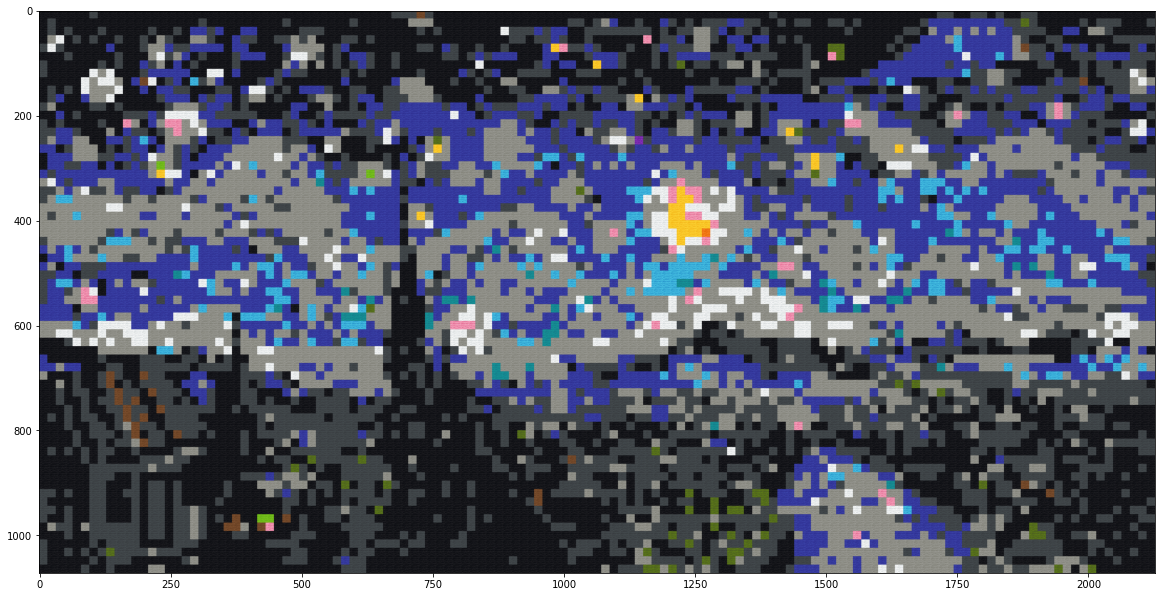

In [ ]:
plt.figure(figsize = (20,20))
plt.imshow(cv2.cvtColor(done_img,cv2.COLOR_BGR2RGB))
plt.show()